## Simple Linear Regression

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [18]:
## Read the dataset
df = pd.read_csv('weight_height.csv')

In [19]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

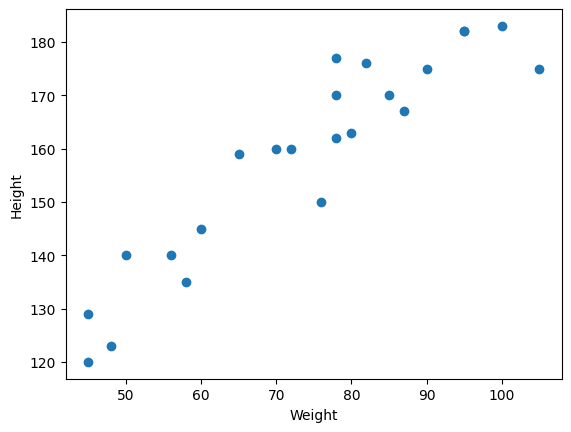

In [20]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [31]:
## Divide our dataset into independent and dependent feature
x = df[['Weight']] # independent features
y = df['Height'] # dependent features

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)

In [33]:
x.shape

(23, 1)

In [34]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [35]:
# standardize the dataset train independent data
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()


In [37]:
scaler.fit_transform(x_train)

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

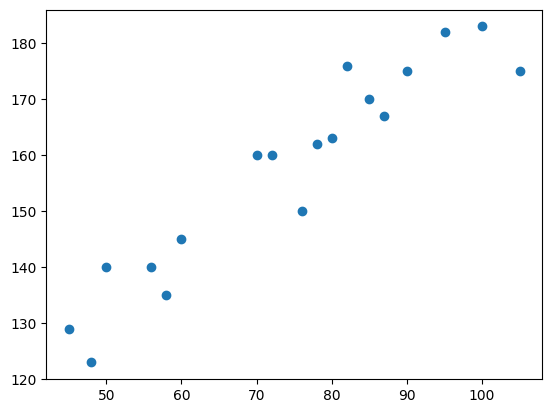

In [38]:
plt.scatter(x_train, y_train)

In [39]:
## train the simple linear Regression Model
from sklearn.linear_model import LinearRegression

In [41]:
regressor = LinearRegression()

In [42]:
regressor.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
print('The slope or coefficient of weight is ', regressor.coef_)
print("Intercept ", regressor.intercept_)

The slope or coefficient of weight is  [0.9630459]
Intercept  85.96709053063559


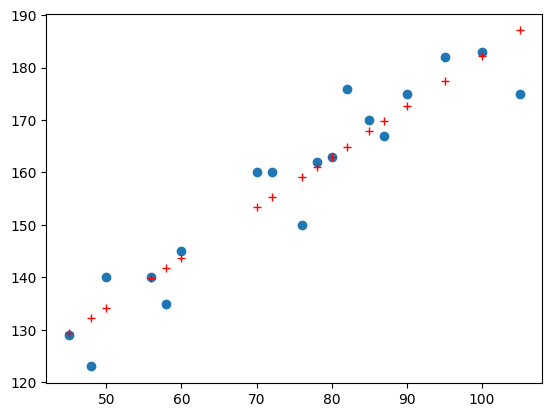

In [46]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train), 'r+')

## Prediction of Train Data
1 - Predicated height output =  intercept + coef(Weights)
2 - y_pred_train = 65.4364 + 1.26(x_train)

Predication of Test Data
1 - Predicated height output = intercept + coef_(Weights)
2 - y_pred_test = 65.4364 + 1.26(x_test)

In [47]:
y_pred_test = regressor.predict(x_test)

In [50]:
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

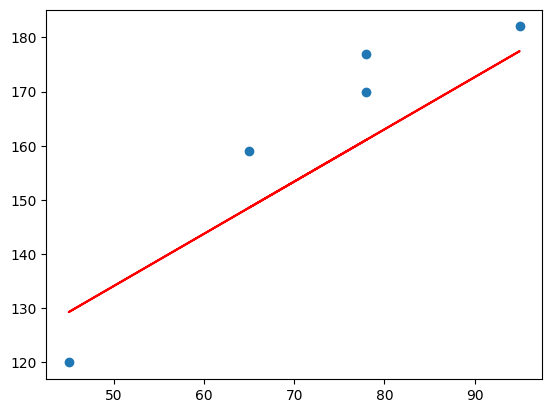

In [52]:
plt.scatter(x_test, y_test)
plt.plot(x_test, regressor.predict(x_test), 'r')

## Performaance Matrics
## MSE, MAE, RMSE
## r sqaure, and ajusted R Sqaure

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [55]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051658
9.822657814519232
10.477400726827078


In [57]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)

## R Square
Formula
**R^2 =  1 - SSR/SST**
R^ = coefficient of  determination
SSR = sum of squares of residuals
SST = total sum of sqaures

In [59]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)

In [60]:
score

0.776986986042344

## Adjusted R Square

**Adjusted R2 = 1 - [(1 - R2)*(n-1)/(n-k-1)]**

Where:
R2  = The R2 of the model
n: The number of obervations
k: The number of predicator variables

In [61]:
# Display adjusted R-sqaured
1 - (1-score)*(len(y_test) -1) /(len(y_test)-x_test.shape[1]-1)

0.7026493147231252

In [62]:
regressor

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [63]:
## new data point weight is 80
scaled_weight = scaler.transform([[80]])
scaled_weight


d:\GitHub\DataScience-ML-DL-NLP-Projects-Practice\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [67]:
scaled_weight[0]

array([0.32350772])

In [69]:
print('The height predication for weight 80 kg is : ',regressor.predict([scaled_weight[0]]))

The height predication for weight 80 kg is :  [86.27864331]


d:\GitHub\DataScience-ML-DL-NLP-Projects-Practice\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


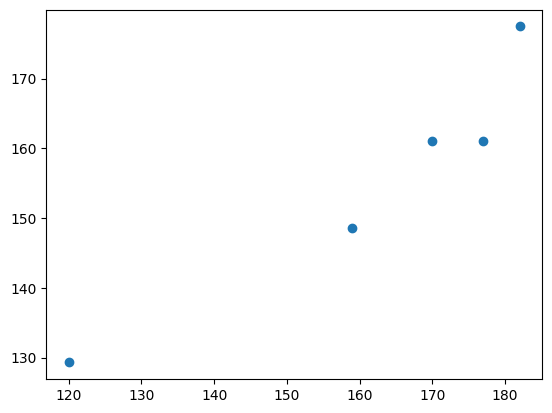

In [70]:
## Assumptions
## plot a scatter plot for the predication
plt.scatter(y_test, y_pred_test)

In [71]:
## Residuals
residuals = y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

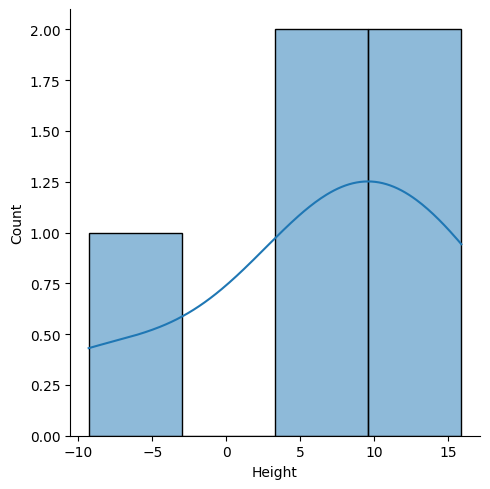

In [72]:
## plot this residuals
import seaborn as sns
sns.displot(residuals, kde=True)

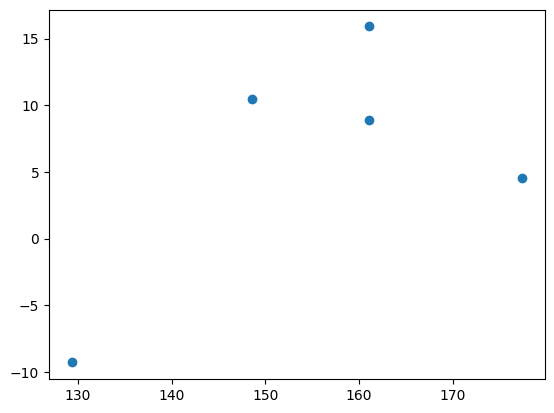

In [73]:
## Scatter plot with respect to predication and residuals
## uniform distribution
plt.scatter(y_pred_test, residuals)